In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [30]:
RELATIVE_PATH = 'physionet.org/files/mimiciii/1.4'
FILE_TYPE = 'csv.gz'
IMAGE_FOLDER = 'images'

In [31]:
def make_table_df(table_name):
    return pd.read_csv(f'{RELATIVE_PATH}/{table_name}.{FILE_TYPE}')

def make_columns_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])


In [32]:
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def get_color_mapping(y_values):
    color_mapping = {}
    for code in y_values:
        color_mapping[code] = generate_random_color()
    return color_mapping

In [33]:
def make_graph_breakdown(df, topics):
    groupby_df = df.groupby(topics).size().unstack()
    groupby_df.plot(kind='bar', stacked=False)
    plt.show()

In [34]:
patients = make_table_df('patients')
admissions = make_table_df('admissions')
diagnoses_icd = make_table_df('diagnoses_icd')

In [35]:
make_columns_datetime(patients, ["DOB", "DOD", "DOD_HOSP", "DOD_SSN"])
make_columns_datetime(admissions, ["ADMITTIME", "DISCHTIME", "DEATHTIME", "EDREGTIME", "EDOUTTIME"])

In [36]:
patient_admissions = pd.merge(patients, admissions, on='SUBJECT_ID')

In [37]:
def group_ethnicities(ethnicity):
    return ethnicity.split("-")[0].rstrip()

def ethnicity(ethnicity, row):
    return row["ETHNICITY"].startswith(ethnicity)

def category_ethnicity(row):
    if row["IS_BLACK"]:
        return "BLACK"
    elif row["IS_WHITE"]:
        return "WHITE"
    elif row["IS_HISPANIC"]:
        return "HISPANIC"
    elif row["IS_ASIAN"]:
        return "ASIAN"
    else:
        return "OTHER"

patient_admissions["ETHNICITY_GROUPED"] = patient_admissions.apply(lambda row: group_ethnicities(row["ETHNICITY"]), axis=1)
patient_admissions["IS_BLACK"] = patient_admissions.apply(lambda row: ethnicity("BLACK", row), axis=1)
patient_admissions["IS_WHITE"] = patient_admissions.apply(lambda row: ethnicity("WHITE", row), axis=1)
patient_admissions["IS_HISPANIC"] = patient_admissions.apply(lambda row: ethnicity("HISPANIC", row), axis=1)
patient_admissions["IS_ASIAN"] = patient_admissions.apply(lambda row: ethnicity("ASIAN", row), axis=1)
patient_admissions["ETHNICITY_CATEGORY"] = patient_admissions.apply(lambda row: category_ethnicity(row), axis=1)

/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/4041620221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(patient_admissions["ETHNICITY_CATEGORY"], palette="pastel", ax=axs[0])
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/4041620221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(patient_admissions["GENDER"], palette="pastel", ax=axs[1])
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/4041620221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(patient_admissions["INSURANCE"], 

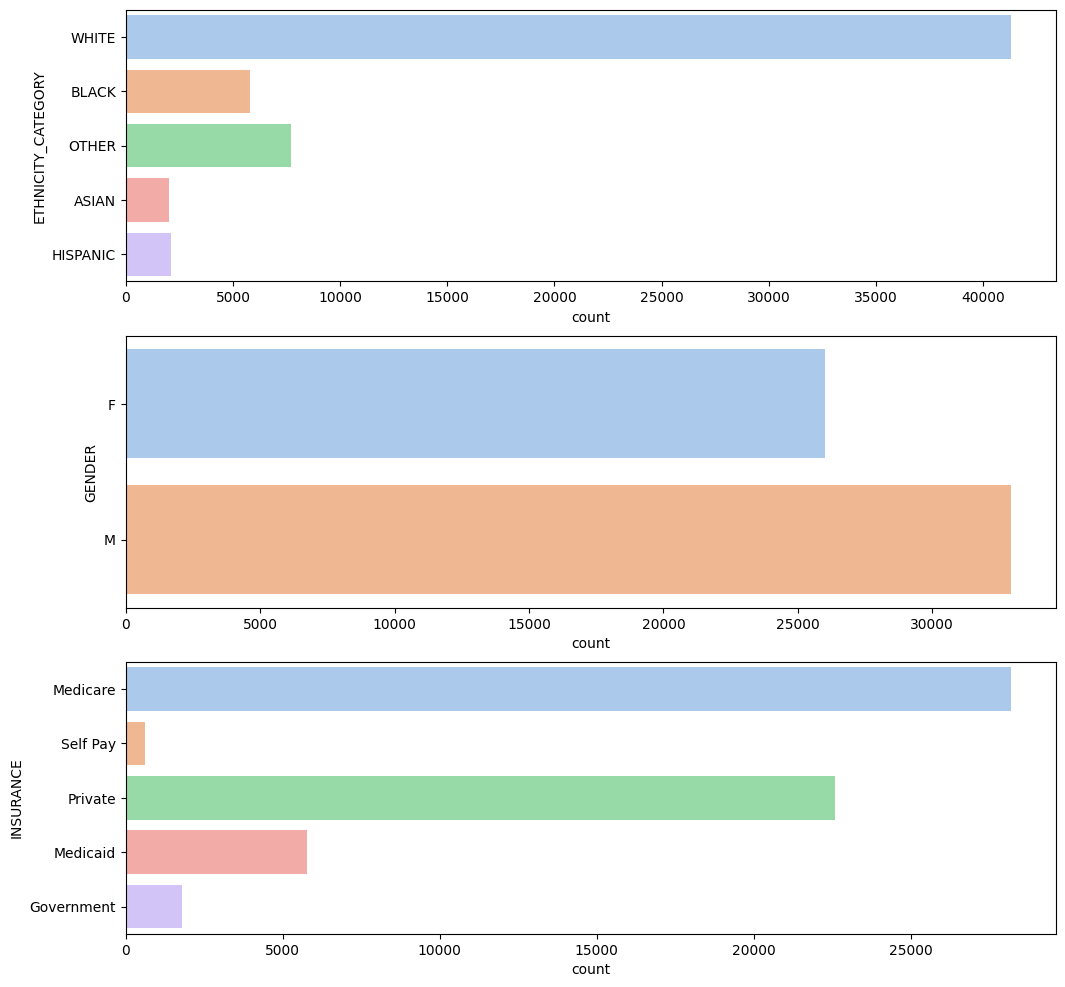

In [38]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

sns.countplot(patient_admissions["ETHNICITY_CATEGORY"], palette="pastel", ax=axs[0])
sns.countplot(patient_admissions["GENDER"], palette="pastel", ax=axs[1])
sns.countplot(patient_admissions["INSURANCE"], palette="pastel", ax=axs[2])

plt.savefig(f'{IMAGE_FOLDER}/patient_demographics.png')
plt.show()


In [39]:
icu_stays = make_table_df('icustays')

In [40]:
patient_adm_icu_stays = pd.merge(patient_admissions, icu_stays, on='SUBJECT_ID')

In [41]:
make_columns_datetime(patient_adm_icu_stays, ["INTIME", "OUTTIME"])
patient_adm_icu_stays["LOS_DAYS"] = (patient_adm_icu_stays["OUTTIME"] - patient_adm_icu_stays["INTIME"]).dt.days

In [42]:
d_diagnoses_icd = make_table_df('d_icd_diagnoses')
icd9_dict = d_diagnoses_icd.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()

In [43]:
patient_adm_diagnoses_icd = pd.merge(patient_admissions, diagnoses_icd, on='SUBJECT_ID')

In [44]:
ETHNICITIES = ["WHITE", "BLACK", "HISPANIC", "ASIAN", "OTHER"]
top_diagnoses_by_ethnicity = {}
for e in ETHNICITIES:
    top_diagnoses_by_ethnicity[e] = patient_adm_diagnoses_icd[patient_adm_diagnoses_icd["ETHNICITY_CATEGORY"] == e]["ICD9_CODE"].value_counts()


/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/3740529251.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnoses.head(10).values, y=top_diagnoses.head(10).index, orient='h', ax=ax, palette=colors)
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/3740529251.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnoses.head(10).values, y=top_diagnoses.head(10).index, orient='h', ax=ax, palette=colors)
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/3740529251.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

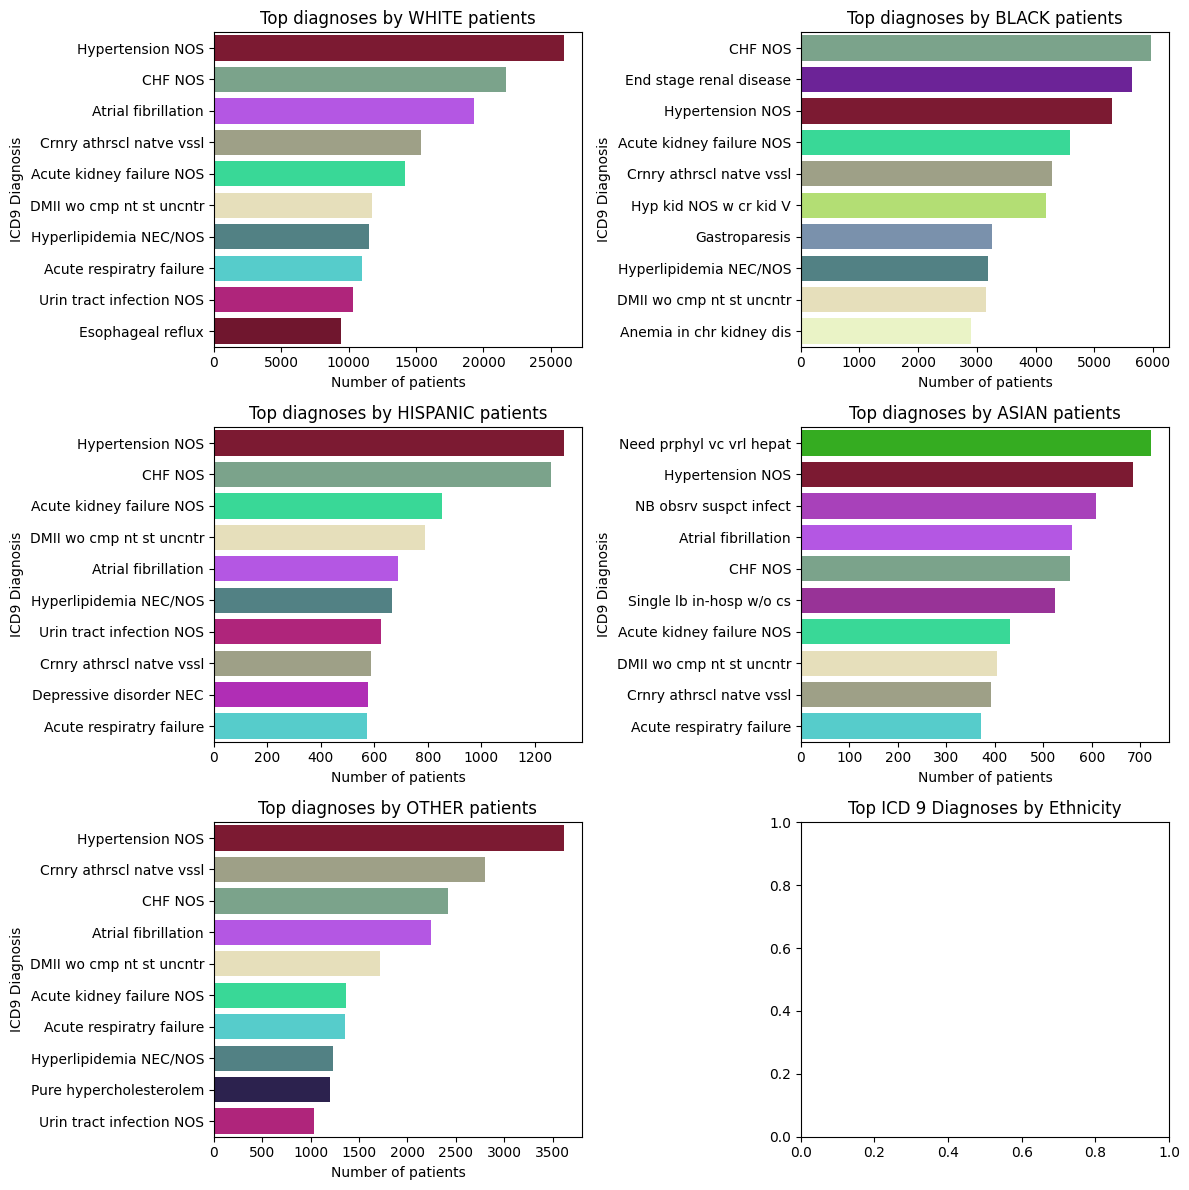

In [45]:
top_diagnoses = patient_adm_diagnoses_icd["ICD9_CODE"].value_counts()

color_mapping = get_color_mapping(patient_adm_diagnoses_icd["ICD9_CODE"].unique())

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for ax, e in zip(axs.flat, top_diagnoses_by_ethnicity):
    top_diagnoses = top_diagnoses_by_ethnicity[e]
    colors = [color_mapping[icd9] for icd9 in top_diagnoses.head(10).index]
    sns.barplot(x=top_diagnoses.head(10).values, y=top_diagnoses.head(10).index, orient='h', ax=ax, palette=colors)
    ax.set_xlabel('Number of patients')
    ax.set_ylabel('ICD9 Diagnosis')
    ax.set_title(f'Top diagnoses by {e} patients')

    short_titles = [icd9_dict[icd9] for icd9 in top_diagnoses.head(10).index]
    ax.set_yticks(range(10), short_titles)

plt.title('Top ICD 9 Diagnoses by Ethnicity')
plt.tight_layout()
plt.savefig(f'{IMAGE_FOLDER}/top_icd9_diagnoses_by_ethnicity.png')
plt.show()

/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/1323264898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ETHNICITY_CATEGORY', y='LOS', data=patient_adm_icu_stays, palette='viridis')
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/1323264898.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ETHNICITY_CATEGORY', y='LOS', data=patient_adm_icu_stays, palette='viridis')


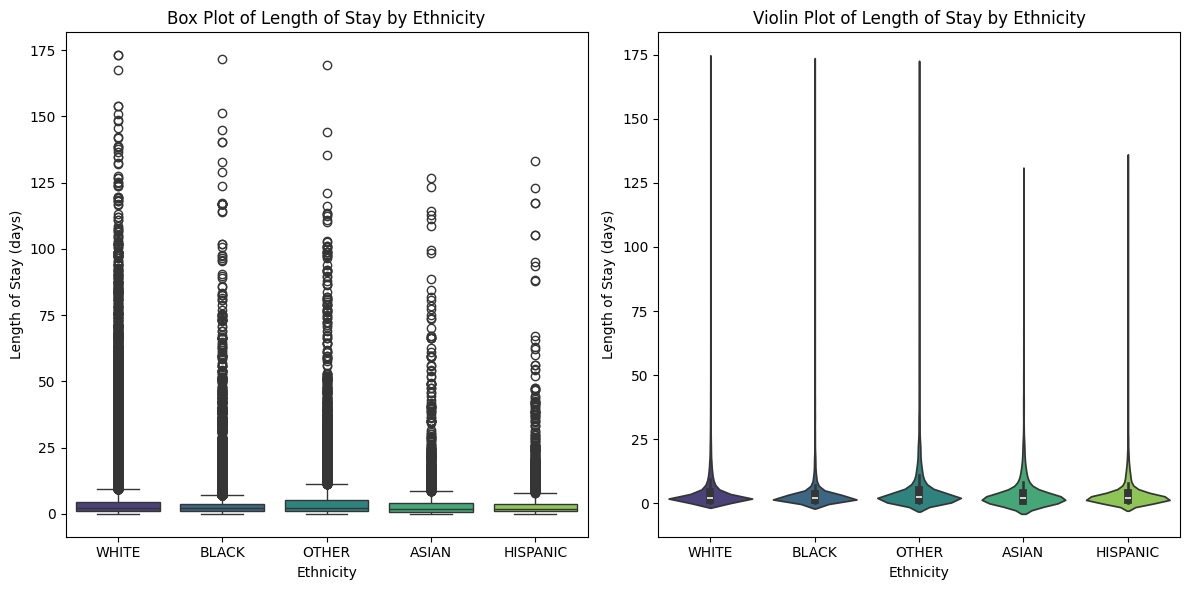

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ETHNICITY_CATEGORY', y='LOS', data=patient_adm_icu_stays, palette='viridis')
plt.ylabel('Length of Stay (days)')
plt.xlabel('Ethnicity')
plt.title('Box Plot of Length of Stay by Ethnicity')

plt.subplot(1, 2, 2)
sns.violinplot(x='ETHNICITY_CATEGORY', y='LOS', data=patient_adm_icu_stays, palette='viridis')
plt.ylabel('Length of Stay (days)')
plt.xlabel('Ethnicity')
plt.title('Violin Plot of Length of Stay by Ethnicity')

plt.tight_layout()
plt.savefig(f'{IMAGE_FOLDER}/los_by_ethnicity.png')
plt.show()

In [47]:
prescriptions = make_table_df('prescriptions')
make_columns_datetime(prescriptions, ["STARTDATE", "ENDDATE"])

/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/666812229.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{RELATIVE_PATH}/{table_name}.{FILE_TYPE}')


In [48]:
prescriptions_icu = prescriptions[prescriptions["ICUSTAY_ID"].notnull()]
non_prescriptions_icu = prescriptions[prescriptions["ICUSTAY_ID"].isnull()]

In [49]:
drug_counts_icu = prescriptions_icu["DRUG"].value_counts()
drug_counts_non_icu = non_prescriptions_icu["DRUG"].value_counts()

In [50]:
top_10_drugs_icu = drug_counts_icu.head(10)
top_10_drugs_non_icu = drug_counts_non_icu.head(10)

total_drugs = top_10_drugs_icu.index.union(top_10_drugs_non_icu.index)
total_drugs = total_drugs.drop_duplicates()

/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/2052893019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drugs_icu.values, y=top_10_drugs_icu.index, orient='h', palette=colors)
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/2052893019.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drugs_non_icu.values, y=top_10_drugs_non_icu.index, orient='h', palette=colors)


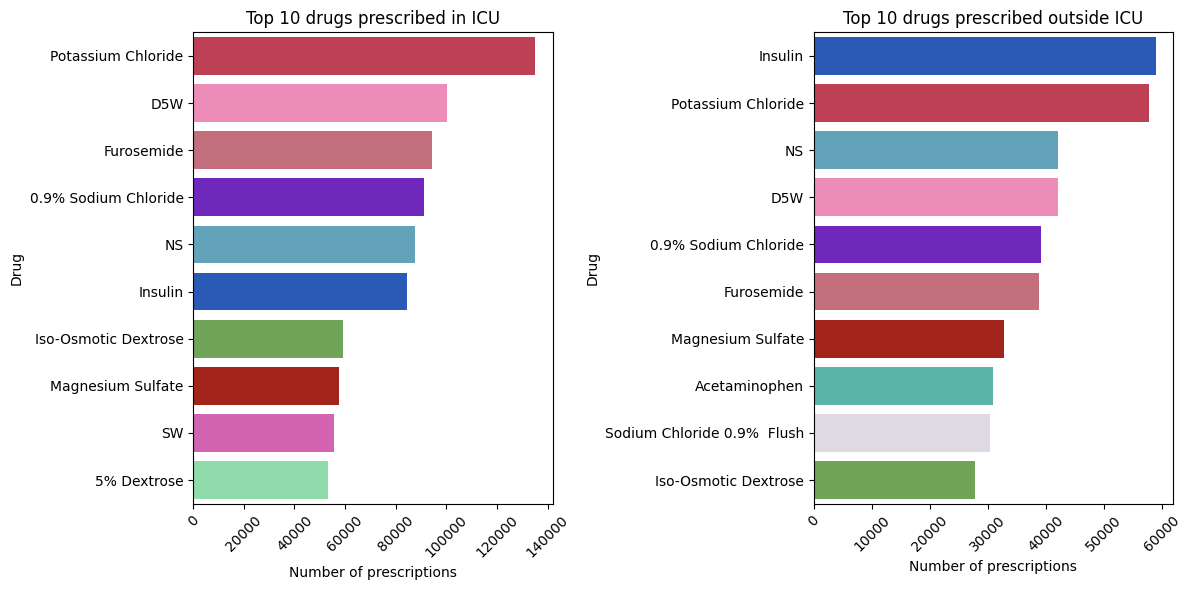

In [51]:
drug_color_mapping = get_color_mapping(total_drugs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = [drug_color_mapping[drug] for drug in top_10_drugs_icu.index]
sns.barplot(x=top_10_drugs_icu.values, y=top_10_drugs_icu.index, orient='h', palette=colors)
plt.xlabel('Number of prescriptions')
plt.ylabel('Drug')
plt.xticks(rotation=45)
plt.title('Top 10 drugs prescribed in ICU')

plt.subplot(1, 2, 2)
colors = [drug_color_mapping[drug] for drug in top_10_drugs_non_icu.index]
sns.barplot(x=top_10_drugs_non_icu.values, y=top_10_drugs_non_icu.index, orient='h', palette=colors)
plt.xlabel('Number of prescriptions')
plt.ylabel('Drug')
plt.xticks(rotation=45)
plt.title('Top 10 drugs prescribed outside ICU')

plt.tight_layout()
plt.savefig(f'{IMAGE_FOLDER}/top_prescribed_drugs.png')
plt.show()

In [52]:
patient_ethnicities = patient_admissions.set_index('SUBJECT_ID')["ETHNICITY_CATEGORY"].to_dict()
patient_gender = patient_admissions.set_index('SUBJECT_ID')['GENDER'].to_dict()

prescriptions_icu.loc[:, "ETHNICITY_CATEGORY"] = prescriptions_icu["SUBJECT_ID"].map(patient_ethnicities)
prescriptions_icu.loc[:, "GENDER"] = prescriptions_icu["SUBJECT_ID"].map(patient_gender)
non_prescriptions_icu.loc[:, "ETHNICITY_CATEGORY"] = non_prescriptions_icu["SUBJECT_ID"].map(patient_ethnicities)
non_prescriptions_icu.loc[:, "GENDER"] = non_prescriptions_icu["SUBJECT_ID"].map(patient_gender)


/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/3625088698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescriptions_icu.loc[:, "ETHNICITY_CATEGORY"] = prescriptions_icu["SUBJECT_ID"].map(patient_ethnicities)
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/3625088698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescriptions_icu.loc[:, "GENDER"] = prescriptions_icu["SUBJECT_ID"].map(patient_gender)
/var/folders/bw/qhd3ssbd2h39x5v7jsp484s40000gr/T/ipykernel_717/36

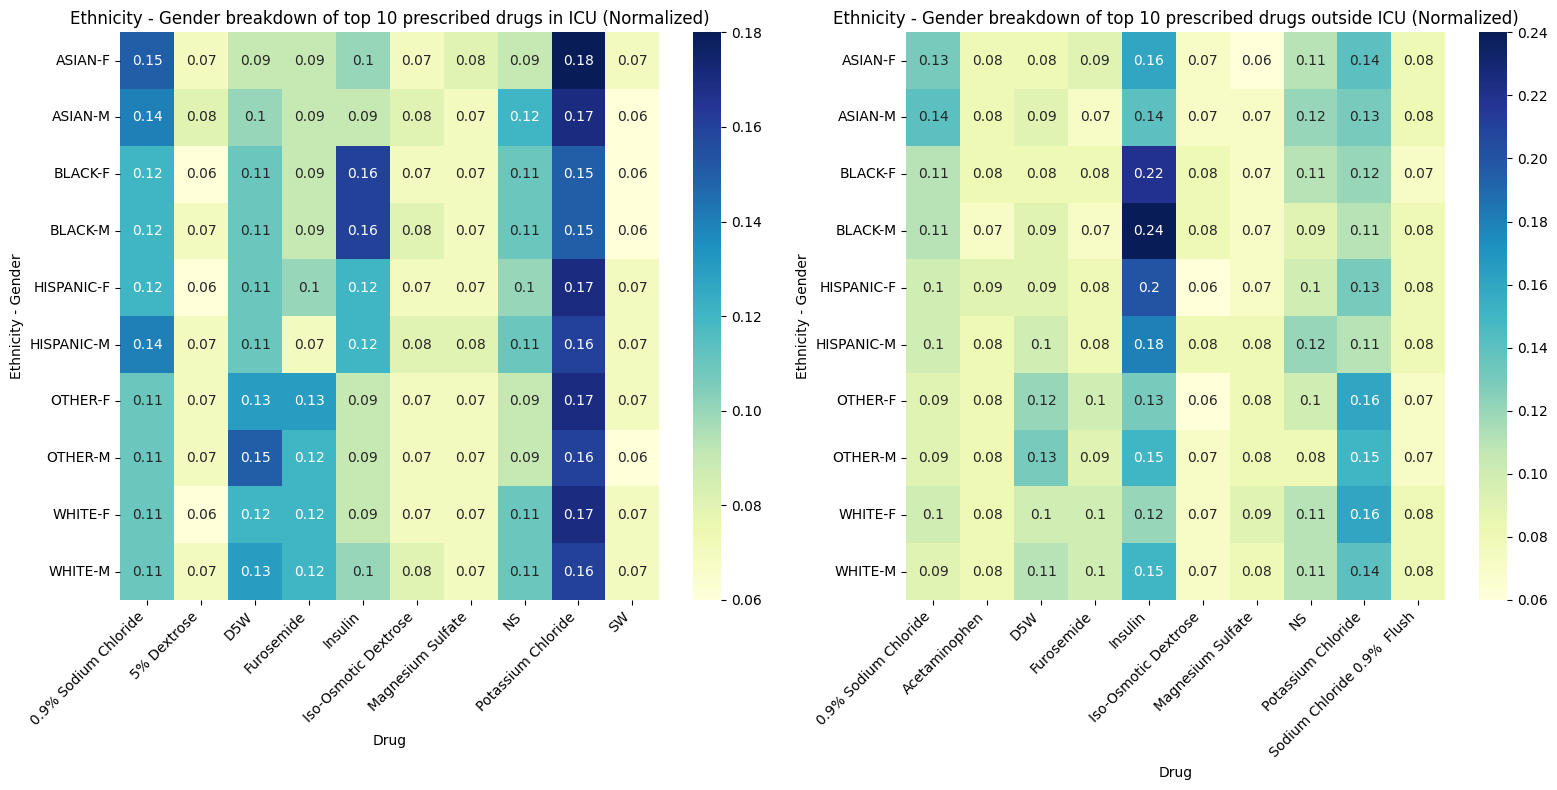

In [53]:
prescriptions_for_top_10_drugs_icu = prescriptions_icu[prescriptions_icu["DRUG"].isin(top_10_drugs_icu.index)]
prescriptions_for_top_10_drugs_non_icu = non_prescriptions_icu[non_prescriptions_icu["DRUG"].isin(top_10_drugs_non_icu.index)]

icu_prescriptions_pivot_table = prescriptions_for_top_10_drugs_icu.groupby(['ETHNICITY_CATEGORY', 'GENDER', 'DRUG']).size().unstack().fillna(0)
non_icu_prescriptions_pivot_table = prescriptions_for_top_10_drugs_non_icu.groupby(['ETHNICITY_CATEGORY', 'GENDER', 'DRUG']).size().unstack().fillna(0)

icu_prescriptions_pivot_table_normalized = icu_prescriptions_pivot_table.div(icu_prescriptions_pivot_table.sum(axis=1), axis=0).round(2)
non_icu_prescriptions_pivot_table_normalized = non_icu_prescriptions_pivot_table.div(non_icu_prescriptions_pivot_table.sum(axis=1), axis=0).round(2)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.heatmap(icu_prescriptions_pivot_table_normalized, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Ethnicity - Gender breakdown of top 10 prescribed drugs in ICU (Normalized)")
plt.xlabel("Drug")
plt.ylabel("Ethnicity - Gender")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.heatmap(non_icu_prescriptions_pivot_table_normalized, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Ethnicity - Gender breakdown of top 10 prescribed drugs outside ICU (Normalized)")
plt.xlabel("Drug")
plt.ylabel("Ethnicity - Gender")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(f'{IMAGE_FOLDER}/prescriptions_breakdown.png')
plt.show()